In [1]:
# ===================================================================================
#
# PROJETO CONCLUSÃO DO CURSO DSA Big Data Real-Time Analytics com Python e Spark
# Projeto 3 - Prevendo o Nível de Satisfação dos Clientes do Santander
# Aluno: Miguel Katayama
#
# Dataset obtido: https://www.kaggle.com/c/santander-customer-satisfaction
# ===================================================================================

# IMPORTANDO BIBLIOTECAS

In [2]:
# ===================================================================================
# Importando as bibliotecas
# ===================================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt    
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix 

## CARREGANDO OS ARQUIVOS

In [3]:
# ===================================================================================
# Carregando os arquivos
# ===================================================================================

# permite que seja exibido todas as colunas do dataframe
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)


arquivo_treino = 'train.csv'
arquivo_teste = 'test.csv'

dftreino = pd.read_csv(arquivo_treino)
dfteste = pd.read_csv(arquivo_teste)

In [4]:
# Como são dois arquivos separados, apenas verificar se realmente todas os atributos do arquivo treino estão 
# no arquivo teste, exceto o atributo TARGET
lista_atributos_treino = dftreino.columns
lista_atributos_teste = dfteste.columns

variavel_nao_existe = []

variavel_nao_existe = [col for col in lista_atributos_treino if col not in lista_atributos_teste and col != 'TARGET']

if len(variavel_nao_existe) > 0:
    print('Erro! Há atributos que não existem no arquivo de teste:', variavel_nao_existe)
else:
    print('Ok, ambos arquivos possuem as mesmos atributos.')

Ok, ambos arquivos possuem as mesmos atributos.


# EDA - ANÁLISE EXPLORATÓRIA

In [5]:
# ===================================================================================
# ANÁLISE EXPLORATÓRIA
# ===================================================================================

# Lista qtde de linhas e colunas de cada arquivo (lembrando que o dataset teste não possui o atributo target)
print('Treino:', dftreino.shape)
print('Teste:', dfteste.shape)

Treino: (76020, 371)
Teste: (75818, 370)


In [6]:
# Lista as primeiras linhas do conteúdo
dftreino.head(5)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var41,ind_var39,ind_var44_0,ind_var44,ind_var46_0,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var27_0,num_var28_0,num_var28,num_var27,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var41,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,num_var46_0,num_var46,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var28,saldo_var27,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var41,saldo_var42,saldo_var44,saldo_var46,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_hace3,imp_amort_var18_ult1,imp_amort_var34_hace3,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_hace3,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_hace3,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_hace3,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10

In [7]:
# Lista as 5 ultimas linhas do conteúdo
dftreino.tail(5)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var41,ind_var39,ind_var44_0,ind_var44,ind_var46_0,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var27_0,num_var28_0,num_var28,num_var27,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var41,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,num_var46_0,num_var46,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var28,saldo_var27,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var41,saldo_var42,saldo_var44,saldo_var46,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_hace3,imp_amort_var18_ult1,imp_amort_var34_hace3,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_hace3,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_hace3,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_hace3,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10

## Analisando as colunas do dataframe

In [8]:
# Lista as colunas do dataframe
dftreino.columns

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3',
       'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object', length=371)

In [9]:
# Verificando os tipos dos campos
dftreino.dtypes

ID                         int64  
var3                       int64  
var15                      int64  
imp_ent_var16_ult1         float64
imp_op_var39_comer_ult1    float64
                            ...   
saldo_medio_var44_hace3    float64
saldo_medio_var44_ult1     float64
saldo_medio_var44_ult3     float64
var38                      float64
TARGET                     int64  
Length: 371, dtype: object

In [10]:
# Agrupando por tipo pois não foi possível visualizar os tipos de todos os campos
dftype = pd.DataFrame(dftreino.dtypes)
dftype.groupby(dftype.iloc[:,0]).size()

0
int64      260
float64    111
dtype: int64

##### Comentário: Não há campos textos. Todos são numéricos, sejam inteiros ou contínuos. Portanto, não será necessário aplicar a conversão dos campos texto para numérico.


## Analisando os valores dos atributos

In [11]:
# Análise das distribuição dos atributos
dftreino.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var41,ind_var39,ind_var44_0,ind_var44,ind_var46_0,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var27_0,num_var28_0,num_var28,num_var27,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var41,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,num_var46_0,num_var46,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var28,saldo_var27,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var41,saldo_var42,saldo_var44,saldo_var46,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_hace3,imp_amort_var18_ult1,imp_amort_var34_hace3,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_hace3,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_hace3,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_hace3,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10

In [12]:
# Invertendo para conseguir efetuar algumas análises
analise_est = dftreino.describe().T.drop('TARGET')
analise_est 

,count,mean,std,min,25%,50%,75%,max
ID,76020.0,75964.050723,43781.947379,1.00,38104.7500,76043.00,113748.7500,151838.00
var3,76020.0,-1523.199277,39033.462364,-999999.00,2.0000,2.00,2.0000,238.00
var15,76020.0,33.212865,12.956486,5.00,23.0000,28.00,40.0000,105.00
imp_ent_var16_ult1,76020.0,86.208265,1614.757313,0.00,0.0000,0.00,0.0000,210000.00
imp_op_var39_comer_ult1,76020.0,72.363067,339.315831,0.00,0.0000,0.00,0.0000,12888.03
...,...,...,...,...,...,...,...,...
saldo_medio_var44_hace2,76020.0,31.505324,2013.125393,0.00,0.0000,0.00,0.0000,438329.22
saldo_medio_var44_hace3,76020.0,1.858575,147.786584,0.00,0.0000,0.00,0.0000,24650.01
saldo_medio_var44_ult1,76020.0,76.026165,4040.337842,0.00,0.0000,0.00,0.0000,681462.90
saldo_medio_var44_ult3,76020.0,56.614351,2852.579397,0.00,0.0000,0.00,0.0000,397884.30


### Valores Negativos

In [13]:
# Exibindo os atributos com valores negativos
analise_est[['min', 'max']][analise_est['min'] < 0]

,min,max
var3,-999999.00,2.380000e+02
saldo_var1,-0.90,3.000000e+06
saldo_var5,-2895.72,6.193292e+05
saldo_var8,-4942.26,2.400450e+05
saldo_var30,-4942.26,3.458077e+06
saldo_var40,-0.90,8.192610e+03
saldo_var42,-4942.26,3.008077e+06
delta_imp_aport_var13_1y3,-1.00,1.000000e+10
delta_imp_aport_var17_1y3,-1.00,1.000000e+10
delta_imp_aport_var33_1y3,-1.00,1.000000e+10


In [14]:
## Verificando valor negativo do atributo var3
dftreino.groupby('saldo_medio_var5_ult1').size()

saldo_medio_var5_ult1
-922.38       1
-733.05       1
-483.90       1
-474.75       1
-239.49       1
             ..
 417571.20    1
 419092.23    1
 469627.50    1
 600450.00    1
 601428.60    1
Length: 14778, dtype: int64

In [15]:
# Verificando casos com campo saldo_medio_var5_ult1 negativo. 
dftreino[dftreino.saldo_medio_var5_ult1 <0].head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var41,ind_var39,ind_var44_0,ind_var44,ind_var46_0,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var27_0,num_var28_0,num_var28,num_var27,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var41,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,num_var46_0,num_var46,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var28,saldo_var27,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var41,saldo_var42,saldo_var44,saldo_var46,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_hace3,imp_amort_var18_ult1,imp_amort_var34_hace3,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_hace3,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_hace3,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_hace3,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10

### Analisando o atributo var3

In [16]:
## Verificando valor negativo do atributo var3
dftreino.groupby('var3').size()

var3
-999999    116  
 0         75   
 1         105  
 2         74165
 3         108  
          ...   
 228       1    
 229       1    
 231       1    
 235       1    
 238       1    
Length: 208, dtype: int64

In [17]:
## Verificando o valor mais recorrente
valor_moda_var3 = dftreino['var3'].mode()
print('O valor mais recorrente da var3 é: ', valor_moda_var3[0])

O valor mais recorrente da var3 é:  2


##### O único valor negativo de var3 é -9999999. Portanto, ajustando esse valor para o valor mais recorrente para que não haja a disparidade desse atributo.

In [18]:
dftreino['var3'][dftreino['var3'] < 0] = valor_moda_var3[0]
dfteste['var3'][dfteste['var3'] < 0] = valor_moda_var3[0]
dftreino.groupby('var3').size()

var3
0      75   
1      105  
2      74281
3      108  
4      86   
       ..   
228    1    
229    1    
231    1    
235    1    
238    1    
Length: 207, dtype: int64

### Analisando os atributos cujo todos valores estão concentrados depois do terceiro quartil

In [19]:
analise_est[['75%', 'max', 'std']][analise_est['75%'] == 0]

,75%,max,std
imp_ent_var16_ult1,0.0,210000.00,1614.757313
imp_op_var39_comer_ult1,0.0,12888.03,339.315831
imp_op_var39_comer_ult3,0.0,21024.81,546.266294
imp_op_var40_comer_ult1,0.0,8237.82,93.155749
imp_op_var40_comer_ult3,0.0,11073.57,153.737066
...,...,...,...
saldo_medio_var33_ult3,0.0,91778.73,538.439211
saldo_medio_var44_hace2,0.0,438329.22,2013.125393
saldo_medio_var44_hace3,0.0,24650.01,147.786584
saldo_medio_var44_ult1,0.0,681462.90,4040.337842


##### Há muitos atributos cujo terceiro quartil está zerado, concentrando todos seus valores no último bloco

A eliminação desses campos não surtiu efeito, ao contrário, gerou mais erros no Confusion Matrix.

### VALORES MISSING

In [20]:
# Verifica se há atributos Missing no arquivo de Teste
if dfteste.isnull().values.any() == True:
    print('ATENÇÃO! Há atributos missing no arquivo de Teste.')
    dfteste.isna().sum()
else:
    print ('Não há atributos missing no arquivo de Teste.')

Não há atributos missing no arquivo de Teste.


In [21]:
# Verifica se há atributos Missing tanto no dataframe do Treino como no Teste
if dftreino.isnull().values.any() == True:
    print('ATENÇÃO! Há atributos missing no arquivo de Treino.')
    dftreino.isna().sum()
else:
    print ('Não há atributos missing no arquivo de Treino.')


Não há atributos missing no arquivo de Treino.


### ATRIBUTOS PREENCHIDOS COM O MESMO VALOR

Busca atributos cujo valor máximo é igual ao valor mínimo, ou seja, possui somente um único valor, não tendo variação.
Esses atributos serão desconsiderados.

In [22]:
dfcolunas = dftreino.agg([min, max]).T

In [23]:
dfcolunas

,min,max
ID,1.00,151838.00
var3,0.00,238.00
var15,5.00,105.00
imp_ent_var16_ult1,0.00,210000.00
imp_op_var39_comer_ult1,0.00,12888.03
...,...,...
saldo_medio_var44_hace3,0.00,24650.01
saldo_medio_var44_ult1,0.00,681462.90
saldo_medio_var44_ult3,0.00,397884.30
var38,5163.75,22034738.76


In [24]:
# Obtém a lista dos atributos com valor fixo
lista_valor_fixo = dfcolunas.loc[dfcolunas['min'] == dfcolunas['max']] 
lista_valor_fixo

,min,max
ind_var2_0,0.0,0.0
ind_var2,0.0,0.0
ind_var27_0,0.0,0.0
ind_var28_0,0.0,0.0
ind_var28,0.0,0.0
ind_var27,0.0,0.0
ind_var41,0.0,0.0
ind_var46_0,0.0,0.0
ind_var46,0.0,0.0
num_var27_0,0.0,0.0


In [25]:
# Obtém os nomes das colunas que possuem valor fixo
coluna_valor_fixo = lista_valor_fixo.index
coluna_valor_fixo


Index(['ind_var2_0', 'ind_var2', 'ind_var27_0', 'ind_var28_0', 'ind_var28',
       'ind_var27', 'ind_var41', 'ind_var46_0', 'ind_var46', 'num_var27_0',
       'num_var28_0', 'num_var28', 'num_var27', 'num_var41', 'num_var46_0',
       'num_var46', 'saldo_var28', 'saldo_var27', 'saldo_var41', 'saldo_var46',
       'imp_amort_var18_hace3', 'imp_amort_var34_hace3',
       'imp_reemb_var13_hace3', 'imp_reemb_var33_hace3',
       'imp_trasp_var17_out_hace3', 'imp_trasp_var33_out_hace3',
       'num_var2_0_ult1', 'num_var2_ult1', 'num_reemb_var13_hace3',
       'num_reemb_var33_hace3', 'num_trasp_var17_out_hace3',
       'num_trasp_var33_out_hace3', 'saldo_var2_ult1',
       'saldo_medio_var13_medio_hace3'],
      dtype='object')

##### Exclui os atributos que possuem apenas um mesmo valor para todas as linhas uma vez que 

In [26]:
dftreino.drop(coluna_valor_fixo, inplace=True, axis=1)
dfteste.drop(coluna_valor_fixo, inplace=True, axis=1)

print(dftreino.shape)
print(dfteste.shape)

(76020, 337)
(75818, 336)


## TRATAMENTO DO ATRIBUTO var38

Esse atributo é considerado um dos mais importantes, conforme o Feature Selection

Ele é um valor contínuo cujo range é enorme, desde 5 mil até 22 milhões (!!)

In [27]:
dftreino[dftreino['TARGET'] == 0].groupby('var38').size()

var38
5163.75        1
6480.66        1
6773.13        1
8290.86        1
8394.93        1
              ..
9833872.77     1
11139895.56    1
11857856.46    1
13268621.28    1
22034738.76    1
Length: 55539, dtype: int64

Skew do atributo var38:  51.274531788112405
Curtose do atributo var38:  4219.873444990573


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000284B9F93D88>]],
      dtype=object)

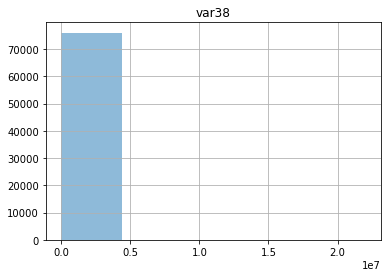

In [28]:
## Verificando a distribuição dos dados do atributo var38.

print('Skew do atributo var38: ', dftreino['var38'].skew())
print('Curtose do atributo var38: ', dftreino['var38'].kurt())


dftreino.hist('var38', bins = 5, alpha = 0.5)

##### O valor do Skew bem positivo, indica que os estão bem concentrados na lado direito, não havendo assim uma distribuição simétrica.
##### E a curtose com valor positivo altíssimo, indica que seus valores estão bem acima do desvio padrão.

## Correlação dos atributos

In [29]:
correlacao = dftreino.corr()

In [30]:
correlacao

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var39,ind_var44_0,ind_var44,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var42,saldo_var44,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_ult1,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10cte_ult1,ind_var9_cte_ult1,ind_var9_ult1,ind_var43_emit_ult1,ind_var43_recib_ult1,var21,num_aport_var13_hace3,num_aport_var13_ult1,num_aport_var17_hace3,num_aport_var17_ult1,num_aport_var33_hace3,num_aport_var33_ult1,num_var7_emit_ult1,num_var7_recib_ult1,num_compra_var44_hace3,num_compra_var44_ult1,num_ent_var16_ult1,num_var22_hace2,num_var22_hace3,num_var2

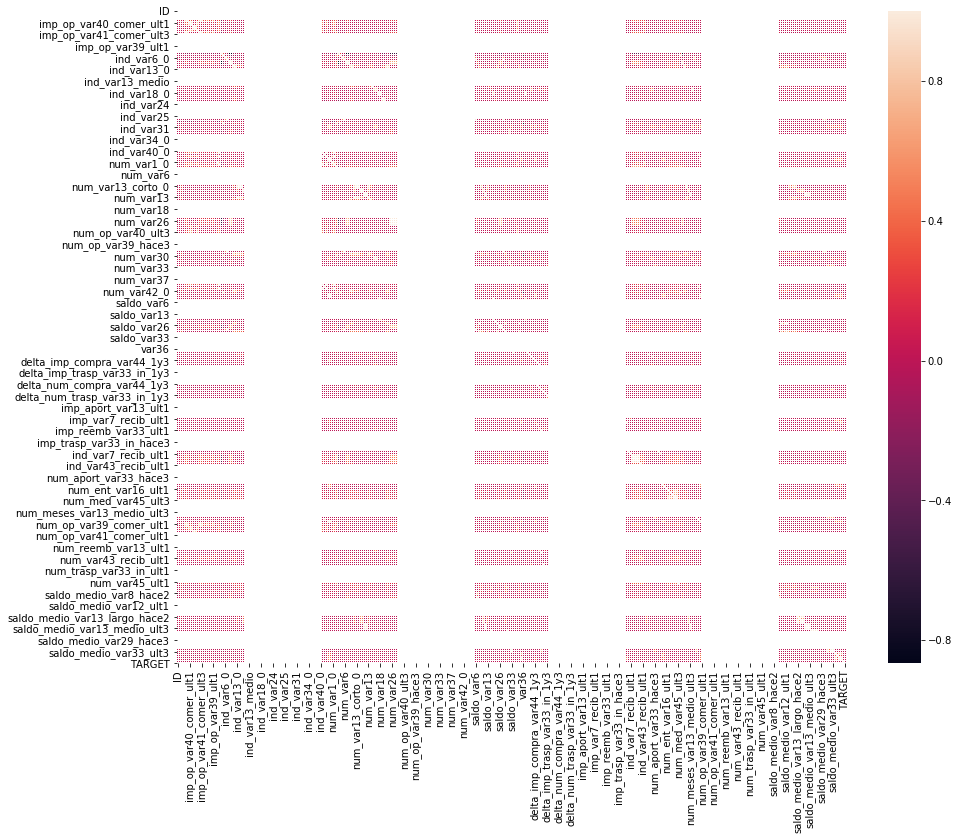

In [31]:
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(correlacao,linewidths=.5, ax=ax );

# FEATURE SELECTION

In [32]:
# Monta os atributos de atributo e o atributo alvo (target)
x_atributo = dftreino.iloc[:,1:-1].values
nomes_atributos = dftreino.iloc[:,1:-1].columns.values
y_target = dftreino.iloc[:,-1].values

### Aplicando a Padronização

In [33]:
# Alterando a escala dos atributos

padronizar = StandardScaler()

x_atributo = padronizar.fit_transform(x_atributo)

### Aplicação do algorítmo para identificar os melhores atributos (features)

In [34]:
# Executa o algoritmo para buscar quais são os atributos mais relevantes.
classif = ExtraTreesClassifier(n_estimators=50, random_state = 0)
classif = classif.fit(x_atributo, y_target)

In [35]:
# Lista os atributos e suas respectivas importâncias
variavel_importancia = pd.Series(classif.feature_importances_, index = nomes_atributos).sort_values(ascending=False)
variavel_importancia

var38                           0.404888
var15                           0.156466
saldo_medio_var5_hace3          0.026070
saldo_medio_var5_ult3           0.024601
num_var45_ult3                  0.020232
                                  ...   
num_trasp_var33_in_ult1         0.000000
delta_imp_amort_var34_1y3       0.000000
delta_imp_reemb_var33_1y3       0.000000
delta_imp_trasp_var33_in_1y3    0.000000
num_var34_0                     0.000000
Length: 335, dtype: float64

In [36]:
# Monta o dataframe dos atributos mais importantes
dfatributosimport = pd.DataFrame(variavel_importancia)
dfatributosimport.columns = {'importancia'} 
dfatributosimport.sort_values(by ='importancia', ascending=False)


,importancia
var38,0.404888
var15,0.156466
saldo_medio_var5_hace3,0.026070
saldo_medio_var5_ult3,0.024601
num_var45_ult3,0.020232
...,...
num_var34,0.000000
ind_var34_0,0.000000
num_var13_medio_0,0.000000
num_var13_medio,0.000000


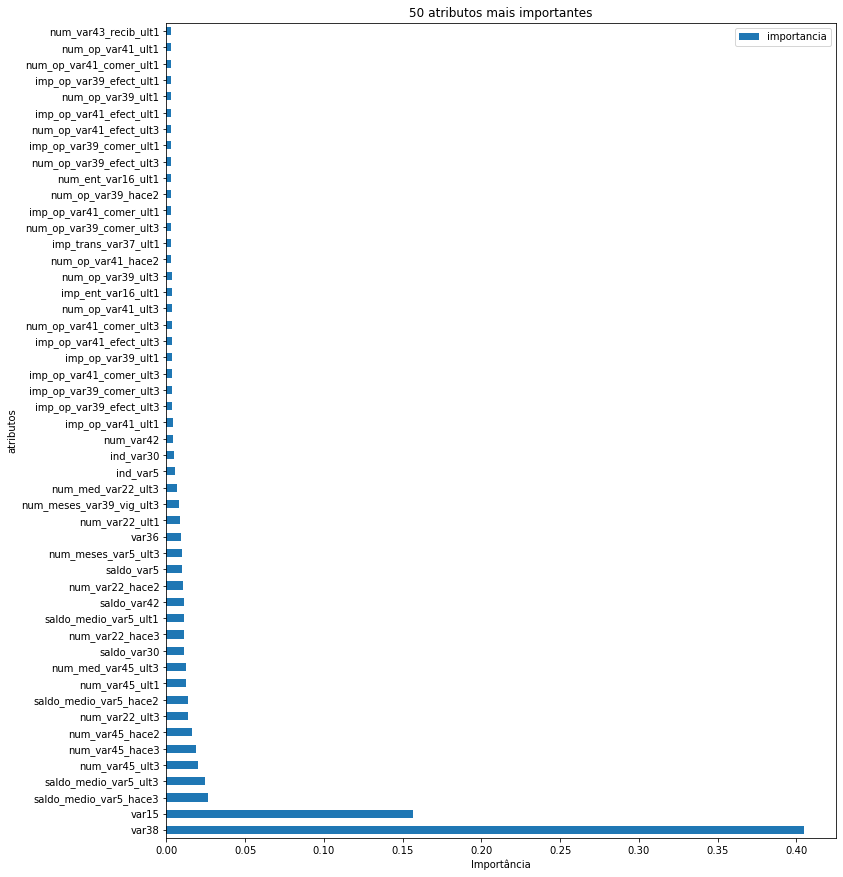

In [37]:
# Lista as colunas que são mais importantes.
dfatributosimport[:50].plot(kind='barh', title='50 atributos mais importantes', figsize=(12, 15))
plt.xlabel('Importância') 
plt.ylabel('atributos') 
plt.show()

In [38]:
# Verificando o agrupamento das importâncias
dfatributosimport['importancia'] = round(dfatributosimport['importancia'], 3)
dfatributosimport.groupby('importancia').size()

importancia
0.000    242
0.001    27 
0.002    14 
0.003    21 
0.004    7  
0.005    2  
0.006    1  
0.008    2  
0.009    1  
0.010    2  
0.011    5  
0.012    1  
0.013    2  
0.014    1  
0.016    1  
0.019    1  
0.020    1  
0.025    1  
0.026    1  
0.156    1  
0.405    1  
dtype: int64

In [39]:
# Gera uma lista acumulada dos valores
dfatributosimport.importancia.cumsum()

var38                           0.405
var15                           0.561
saldo_medio_var5_hace3          0.587
saldo_medio_var5_ult3           0.612
num_var45_ult3                  0.632
                                ...  
num_trasp_var33_in_ult1         0.981
delta_imp_amort_var34_1y3       0.981
delta_imp_reemb_var33_1y3       0.981
delta_imp_trasp_var33_in_1y3    0.981
num_var34_0                     0.981
Name: importancia, Length: 335, dtype: float64

#### Análise: A grande parte dos atributos estão com importância zerada.
#### Portanto, vamos ignorar esses atributos e utilizar os demais.

In [40]:
# Gerando a lista dos atributos que possuem importância maior que 0
listavar = dfatributosimport.loc[dfatributosimport['importancia'] > 0.00000] 
print(listavar.shape)
listavar


(93, 1)


,importancia
var38,0.405
var15,0.156
saldo_medio_var5_hace3,0.026
saldo_medio_var5_ult3,0.025
num_var45_ult3,0.020
...,...
ind_var5_0,0.001
ind_var41_0,0.001
ind_var26_cte,0.001
ind_var10cte_ult1,0.001


In [41]:
# Gera o total das importância. Veja que correspondem quase todas as importâncias
listavar['importancia'].sum()

0.9810000000000002

#### Os 93 atributos respondem por 98% da importância retornada pela Feature Selection

In [42]:
# Obtém os nomes dos atributos selecionados
atributos_select = listavar.index

In [43]:
# Gera a correlação entre esses atributos selecionados
correlacao_sel = dftreino[atributos_select].corr()

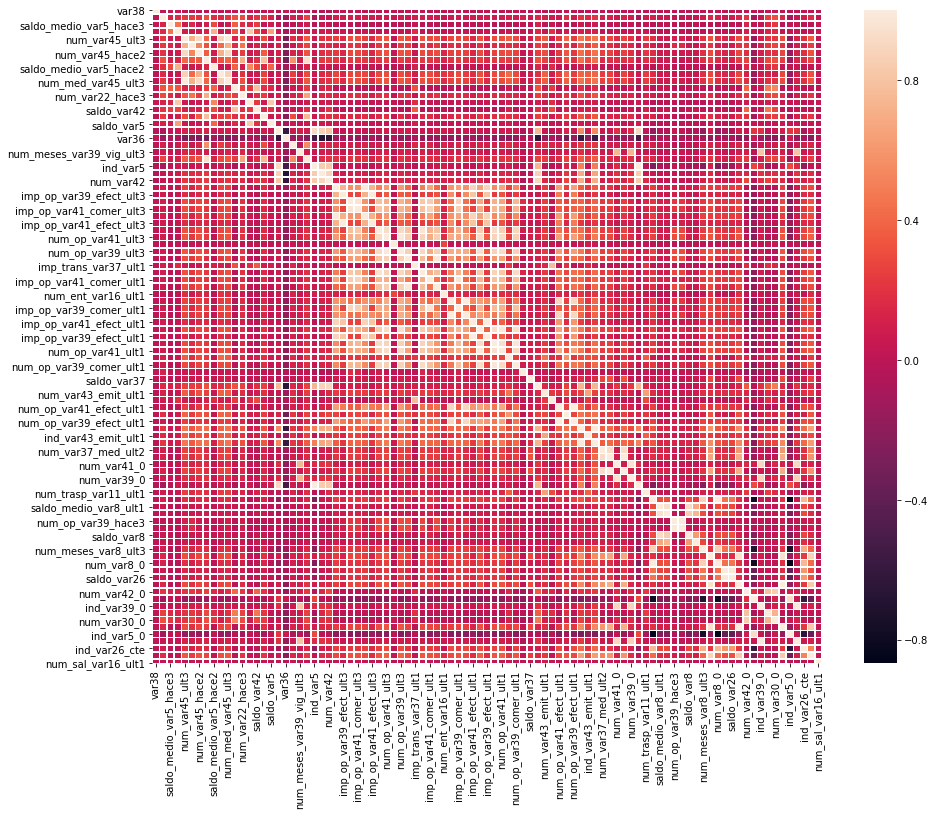

In [44]:
# Monta o gráfico com as correlações
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(correlacao_sel,linewidths=.5, ax=ax );

# TREINO

In [45]:
# Usando apenas os atributos que foram selecionadas na etapa Feature Selection
x_atributo = dftreino.loc[:,atributos_select].values
y_target = dftreino.iloc[:,-1].values

In [46]:
# Aplicando a padronização
x_atributo = padronizar.fit_transform(x_atributo)

In [47]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x_atributo, y_target, test_size=0.3, random_state=0)

In [48]:
print(x_treino.shape)

(53214, 93)


In [49]:
# Montando o modelo
modelo_rfc = RandomForestClassifier(n_estimators=10, random_state =0)

# Treinando o modelo
modelo_rfc.fit(x_treino, y_treino)

# Predição
predicao_rfc = modelo_rfc.predict(x_teste)

print('Acurácia: %2.2f%% ' % round(accuracy_score(y_teste, predicao_rfc) *100,2), '\n')
print('Confusion Matrix: \n', confusion_matrix(y_teste, predicao_rfc))

Acurácia: 95.39%  

Confusion Matrix: 
 [[21709   183]
 [  868    46]]


In [50]:
# Aplicando Cross-Validation
from sklearn.model_selection import cross_val_score

cv_results = cross_val_score(modelo_rfc, x_atributo, y_target, cv = 10, scoring = 'accuracy')
print('Acurácia aplicando CV: %2.2f%% ' % round(100* cv_results.mean(),2))

Acurácia aplicando CV: 95.33% 


#### A aplicação do Cross-Validation não melhorou o resultado da acurácia.

## ANÁLISE DO RESULTADO

A acurácia foi de 95% o que poderia ser considerado ótimo. <br>
Porém, analisando com Confusion Matrix, é possível verificar que houve muito erro no Falso Positivo, sendo esse 4x maior que o Verdadeiro Negativo. Ou seja, o modelo está acertando os positivos porém não está conseguindo prever satisfatoriamente o Verdadeiro Negativo, classificando muito deles como Positivo ao invés de Negativo. <br>

O Balanceamento (Sampling) é uma das técnicas que poderiam auxiliar nesse processo. Porém, como a base da classe 1 é extremamente baixa, a aplicação de uma técnica simples de balanceamento, como apenas considerar a quantidade da base da classe 0 igual a 1 não melhorou o modelo, ao contrário, tornou o modelo mais tendencioso ainda. <br>

Assim, uma alternativa para melhorar o modelo é efetuar mais transformações nos atributos e aplicar o PCA.


# GERAÇÃO DA SUBMISSÃO DO RESULTADO DO ARQUIVO TESTE

In [51]:
# Obtém os dados de testes, usando os atributos selecionados
x_arq_teste = dfteste.loc[:,atributos_select].values

# Efetua a mesma padronização de dados, aplicado para a base de treino
x_arq_teste = padronizar.fit_transform(x_arq_teste)

# Aplica o mesmo modelo gerado (com Random Forest)
predicao_arq_teste = modelo_rfc.predict(x_arq_teste)
resultado = pd.DataFrame(predicao_arq_teste)
resultado.columns = {'TARGET'}

# Inclui a coluna ID
resultado['ID'] = dfteste['ID']  

# Exporta o arquivo CSV com o resultado
resultado.to_csv('submissao_projeto3.csv', index=False)